In [1]:
import glob
import os
from matplotlib import pyplot as plt
import torch

from monai.transforms import (
    AsDiscrete,
    EnsureChannelFirstd,
    Compose,
    CropForegroundd,
    LoadImaged,
    Orientationd,
    RandCropByPosNegLabeld,
    ScaleIntensityRanged,
    Spacingd,
    EnsureType,
    RandAffined,
    RandRotated,
    RandFlipd,
    Rand3DElasticd,
    ResizeWithPadOrCropd
)

In [2]:
import SimpleITK as sitk
import numpy as np
img1 = sitk.ReadImage(r"C:\Git\MONAI_DATA_DIRECTORY\Task01_pancreas\img\img_0002.nii.gz")
img2 = sitk.ReadImage(r"C:\Git\MONAI_DATA_DIRECTORY\Task01_pancreas\img_proc\0002.nii.gz")

img1_arr = sitk.GetArrayFromImage(img1)
img2_arr = sitk.GetArrayFromImage(img2)

In [3]:
img1_arr.shape

(226, 512, 512)

In [4]:
img2_arr.shape

(117, 175, 175)

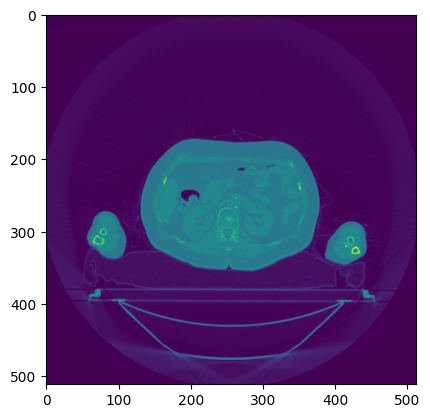

In [5]:
plt.imshow(img1_arr[100])

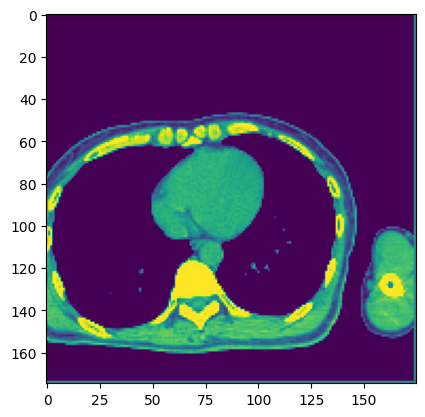

In [6]:
plt.imshow(img2_arr[100])

In [ ]:
img1 = sitk.ReadImage(r"C:\Git\MONAI_DATA_DIRECTORY\Task01_pancreas\pancreas_seg\img_0002.nii.gz")
img2 = sitk.ReadImage(r"C:\Git\MONAI_DATA_DIRECTORY\Task01_pancreas\img_proc\0002.nii.gz")